Chapter 29
# 处理离群值
Book_1《编程不难》 | 鸢尾花书：从加减乘除到机器学习  

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs, make_moons
from sklearn.svm import OneClassSVM
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest

In [4]:
# 生成数据
n_samples = 500
outliers_fraction = 0.10
n_outliers = int(outliers_fraction * n_samples)
n_inlines  = n_samples - n_outliers
X_outliers = np.random.uniform(low=-6,high=6,size=(n_outliers,2))

In [6]:
np.random.RandomState(0)
blobs_params = dict(random_state=0,n_samples=n_inlines, n_features=2)

In [10]:
datasets = [
    make_blobs(centers=[[0, 0], [0, 0]], cluster_std=0.5, **blobs_params)[0],
    make_blobs(centers=[[2, 2], [-2, -2]], cluster_std=[0.5, 0.5], **blobs_params)[0],
    make_blobs(centers=[[2, 2], [-2, -2]], cluster_std=[1.5, 0.3], **blobs_params)[0],
    4.0*(make_moons(n_samples=n_samples, noise=0.05, random_state=0)[0]- np.array([0.5, 0.25]))
]

In [11]:
# 处理离群值
anomaly_algorithms = [
     EllipticEnvelope(contamination=outliers_fraction, random_state=42),
     OneClassSVM(nu=outliers_fraction, kernel="rbf", gamma=0.1),
     IsolationForest(contamination=outliers_fraction, random_state=42)
]

In [20]:
# 网格化数据，用来绘制等高线
xx, yy = np.meshgrid(np.linspace(-7, 7, 150), np.linspace(-7, 7, 150))
xy = np.c_[xx.ravel(), yy.ravel()]
colors = np.array(["#377eb8", "#ff7f00"])

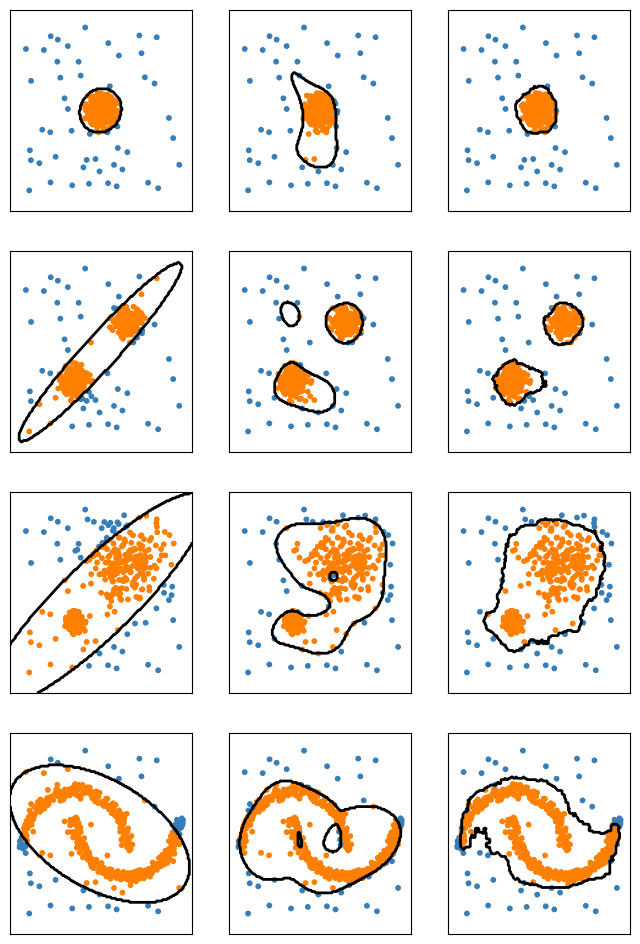

In [22]:
# 可视化
fig = plt.figure(figsize=(8,12))
plot_idx = 1
# 四个数据集
for idx, X in enumerate(datasets):
    X = np.concatenate([X, X_outliers], axis=0)
    # 三种处理方式
    for algorithm in anomaly_algorithms:
        y_pred = algorithm.fit(X).predict(X)
        ax = fig.add_subplot(4,3,plot_idx)
        plot_idx += 1
        Z = algorithm.predict(xy)
        Z = Z.reshape(xx.shape)
        # 绘制边界
        ax.contour(xx, yy, Z, levels=[0], linewidths=2, colors="black")
        # 绘制散点数据集
        ax.scatter(X[:, 0], X[:, 1], s=10, color=colors[(y_pred + 1) // 2])
        ax.set_xlim(-7, 7)
        ax.set_ylim(-7, 7)
        ax.set_xticks(())
        ax.set_yticks(())